In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
#DEFINE PANDA DATA FRAME 
df = pd.DataFrame({
    'x':[12,20,28,18,29,33,24,45,45,52,51,52,55,53,55,61,64,69,72],
    'y':[39,36,30,52,54,46,55,59,63,70,66,63,58,23,14,8,19,7,24]
})

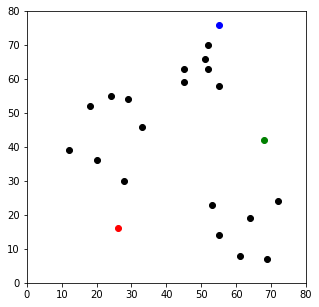

In [3]:
np.random.seed(200)#
k = 3 #number of groups or clusters
#Now chossing the centroids
centroids = {
    i+1: [np.random.randint(0,80),np.random.randint(0,80)] #Number is greater than zero and less than 80
    for i in range(k)
     
}
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color='k') # k is assign three different colors because our cluster is 3
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
  plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show() #shows a three clusters are red, green and blue

    x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0  12  39        26.925824        56.080300        56.727418        1     r
1  20  36        20.880613        48.373546        53.150729        1     r
2  28  30        14.142136        41.761226        53.338541        1     r
3  18  52        36.878178        50.990195        44.102154        1     r
4  29  54        38.118237        40.804412        34.058773        3     b


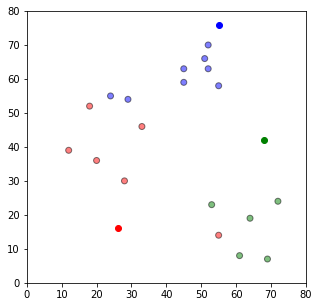

In [4]:
def assignment(df, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2
                + (df['y'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

df = assignment(df, centroids)
print(df.head())

fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

#RESULTS SHOWS distance from first cluster is 26, from second is 56 and third 56.72, so it is close to first cluster we assign 1 and color of first cluster is red

In [0]:
#NEXt STAGE CENTROID IS UPDATED, SO CENTROID IS SHIFTED

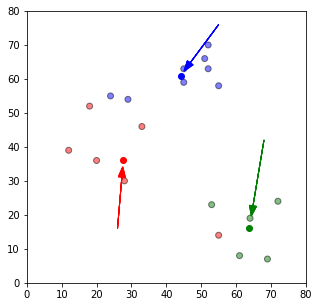

In [6]:
import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

for r in range(1):
  old_centroids = copy.deepcopy(centroids)
  centroids = update(centroids)
    
  fig = plt.figure(figsize=(5, 5))
  ax = plt.axes()
  plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
  for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
    plt.xlim(0, 80)
    plt.ylim(0, 80)
    for i in old_centroids.keys():
      old_x = old_centroids[i][0]
      old_y = old_centroids[i][1]
      dx = (centroids[i][0] - old_centroids[i][0]) * 0.75 #positioning arrow
      dy = (centroids[i][1] - old_centroids[i][1]) * 0.75 #positioning arrow
      ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])
plt.show()

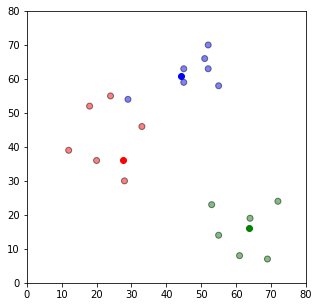

In [7]:
#NOW REPEATED PROCESS

df = assignment(df, centroids)

#plot results
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.5,edgecolor='k')
for i in centroids.keys():
  plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

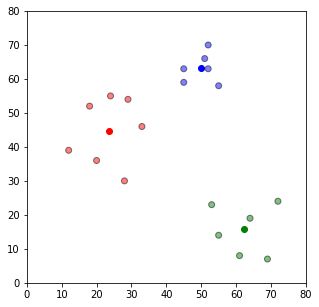

In [8]:
#continu until all assigned categories don't change any more
while True:
  closest_centroids = df['closest'].copy(deep=True)
  centroids = update(centroids)
  df = assignment(df,centroids)
  if closest_centroids.equals(df['closest']):
    break
    
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.5,edgecolor='k')
for i in centroids.keys():
  plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

In [9]:
#SAME TASk PERFORM BY BUILT IN LIBRARAY In SCIKIT LEARN
#DEFINE PANDA DATA FRAME 
df = pd.DataFrame({
    'x':[12,20,28,18,29,33,24,45,45,52,51,52,55,53,55,61,64,69,72],
    'y':[39,36,30,52,54,46,55,59,63,70,66,63,58,23,14,8,19,7,24]
})

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

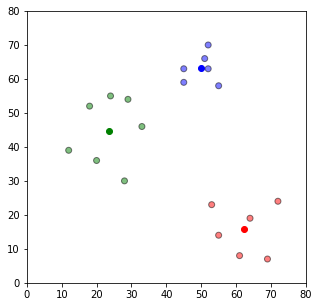

In [11]:
fig = plt.figure(figsize=(5,5))

colors = map(lambda x: colmap[x+1], labels)
colors1 = list(colors)
plt.scatter(df['x'],df['y'],color=colors1,alpha=0.5,edgecolor='k')
for idx, centroid in enumerate(centroids):
  plt.scatter(*centroid,color=colmap[idx+1])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()